In [ ]:
# Importations
import time
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

In [2]:
# Automating the data cleaning process
def wrangle(filepath):
    df = pd.read_csv(filepath)
    df.set_index("Date", inplace=True)
    df.index = pd.to_datetime(df.index)
    df.index = df.index.tz_localize("UTC").tz_convert("America/Los_Angeles")
    df.drop(columns=["High", "Low", "Open", "Volume"], inplace=True)

    y = df["Close"]

    return y

In [3]:
# Running the wrangle function
y = wrangle("btc_data.csv")
y.head()

Date
2020-06-30 17:00:00-07:00    9228.325195
2020-07-01 17:00:00-07:00    9123.410156
2020-07-02 17:00:00-07:00    9087.303711
2020-07-03 17:00:00-07:00    9132.488281
2020-07-04 17:00:00-07:00    9073.942383
Name: Close, dtype: float64

In [4]:
y.shape

(1837,)

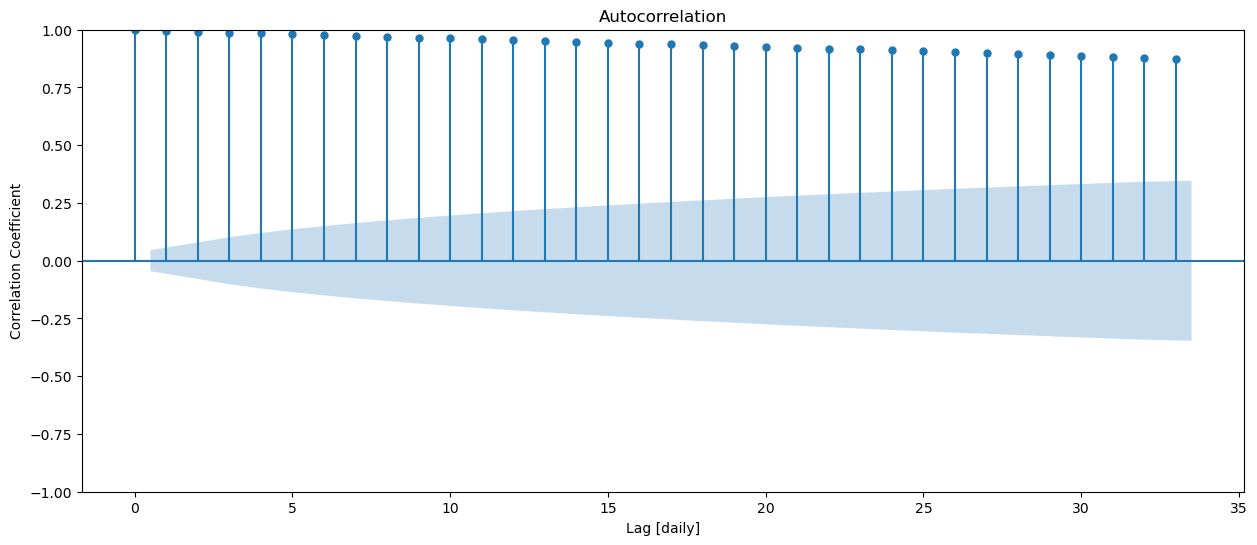

In [6]:
# Plotting the Auto Correlation
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y, ax=ax)
plt.xlabel("Lag [daily]")
plt.ylabel("Correlation Coefficient");

Text(0, 0.5, 'Correlation Coefficient')

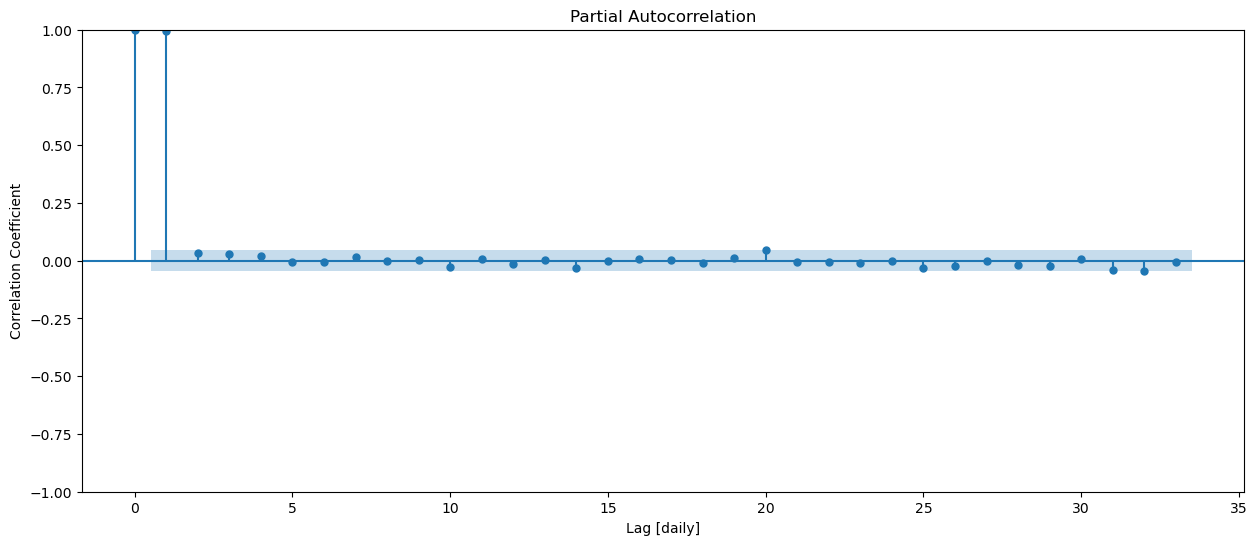

In [ ]:
# Plotting the Partial Correlation
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y, ax=ax)
plt.xlabel("Lag [daily]")
plt.ylabel("Correlation Coefficient");

In [ ]:
# Splitting into training and test data
cut_off = int(len(y) * 0.8)
y_train, y_test = y.iloc[: cut_off], y.iloc[cut_off :]

# Checking the split 
len(y_train) + len(y_test) == len(y)

True

In [9]:
# Cheacking mean absolute error baseline
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print(f"y_mean", y_mean)
print(f"mae_baseline", mae_baseline)

y_mean 35391.39032252489
mae_baseline 13769.626423865622


In [10]:
# Setting parameters for hyperparameters
p_params = range(0, 25, 8)
q_params = range(0, 3, 1)

print("p_params:", p_params)
print("q_params:", q_params)

p_params: range(0, 25, 8)
q_params: range(0, 3)
